# Implement all Machine learning by using SK-learn Library

In [1]:
# load library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import pylab as pl

# Display HTML
from IPython.core.display import display, HTML

In [2]:
data = pd.read_csv('./Data/iris.csv')

In [3]:
data.head()

,id,sepallength,sepalwidth,petallength,petalwidth,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.columns

Index(['id', 'sepallength', 'sepalwidth', 'petallength', 'petalwidth',
       'class'],
      dtype='object')

# Visualization

d:\python code\env_3.8\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


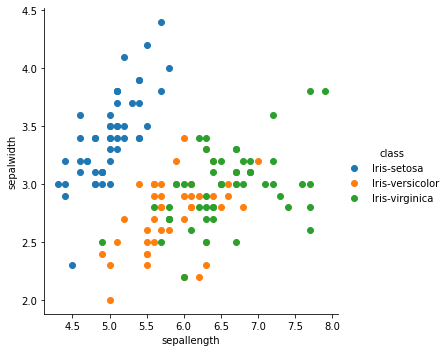

In [6]:
sns.FacetGrid(data, hue='class', size=5)\
.map(plt.scatter, 'sepallength', 'sepalwidth')\
.add_legend()

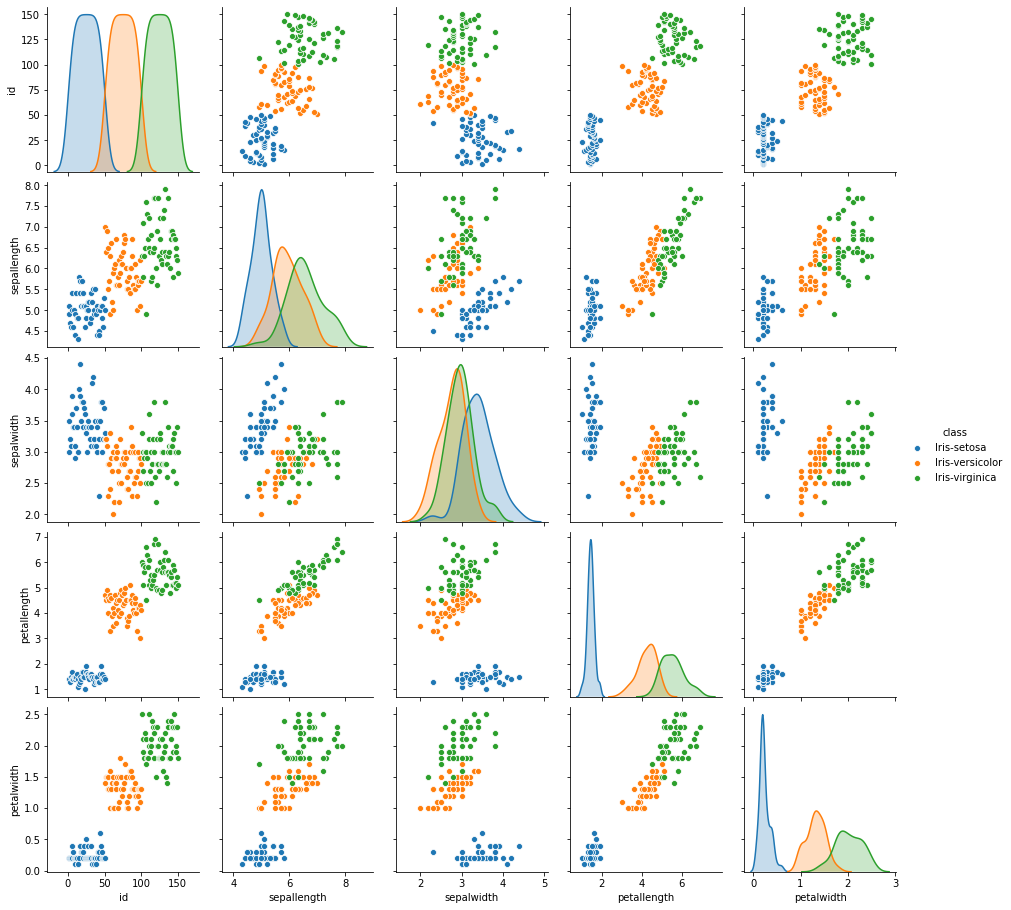

In [7]:
sns.pairplot(data, hue='class')

# Prepare Train and Test 

In [8]:
X = data.iloc[:, :-1].values    #   X -> Feature Variables
y = data.iloc[:, -1].values #   y ->  Target

# Splitting the data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, y_test.shape

((105, 5), (45,))

# 1. Linear Regression

In [16]:
# Feature Variables 
XL = data.iloc[:, :-1].values 

# Target 
yL = data.iloc[:, -1]

In [17]:
# Convert object data into int  by labelEncoder
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
Y_train = le.fit_transform(yL)

In [18]:
Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
# split train test data 
X_trainL, X_testL, y_trainL, y_testL = train_test_split(
    XL, Y_train, test_size = .3, random_state=0)

In [21]:
# Create Linear Regression model 
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression()
modelLR.fit(X_trainL, y_trainL)
y_predict = modelLR.predict(X_testL)

In [22]:
# Evaluationg model score 
from sklearn import metrics
print('y_intercept                  = ', modelLR.intercept_)
print('Best coefficients            = ', modelLR.coef_)
print('Mean Abs Error               = ', metrics.mean_absolute_error(y_testL,y_predict))
print('Mean Squared Error           = ', metrics.mean_squared_error(y_testL,y_predict))
print('Root Mean Sqrt Error or RMSE = ', np.sqrt(metrics.mean_squared_error(y_testL, y_predict)))
print('r2 Values                    = ', metrics.r2_score(y_testL, y_predict))



y_intercept                  =  -0.024298523519847626
Best coefficients            =  [ 0.00680677 -0.10726764 -0.00624275  0.22428158  0.27196685]
Mean Abs Error               =  0.14966835490524966
Mean Squared Error           =  0.032554517379698125
Root Mean Sqrt Error or RMSE =  0.18042870442282216
r2 Values                    =  0.9446026069799255


###### y_intercept  = Distance from zero point to y axis line start point . If it is less than 0 then line will start below the 0 position of a graph. 

## 2. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
# Summary of DT 
print('Classification report: ', classification_report(y_test, y_pred))

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

print(' Accuracy: ', accuracy_score(y_pred, y_test))


Classification report:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix: 
[[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]
 Accuracy:  0.9777777777777777


## 3.RandomForest

In [25]:
from sklearn.ensemble import RandomForestClassifier 
model  = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
# Summary
print('Classifications Report :')
print(classification_report(y_test, y_pred))

print('Confision Matrix :')
print(confusion_matrix(y_pred, y_test))

print('Accuracy:', accuracy_score(y_pred, y_test))

Classifications Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confision Matrix :
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy: 1.0


## 4. Logistic Regression 

It is a classifications algorithm not a regression algorithm
Hence, it is also known as logit regression. Since, it predicts the probability,
its output values lies between 0 and 1 (as expected).

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

d:\python code\env_3.8\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print('Classification Report: ')
print(classification_report(y_test, y_pred))

print('Confusion Matrix : ')
print(confusion_matrix(y_test, y_pred))

print('Accuracy:' , accuracy_score(y_pred, y_test))

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix : 
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy: 1.0


# 5. k-Nearest Neighbors
It can be used for both classification and regression problems.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [33]:
# summary 
print('Classification Report: ')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Accuracy: ', accuracy_score(y_pred, y_test))

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy:  1.0


# 6. Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [38]:
# Summary 
print('Classification Report')
print(classification_report(y_test, y_pred))

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

print('Accuracy: ', accuracy_score(y_pred, y_test))

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix: 
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy:  1.0


# 7. SVM
It is a classification method. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

In [39]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [40]:
# Summary 
print('Classification report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Accuracy: ', accuracy_score(y_pred, y_test))

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy:  1.0


# 8. Nu-Support Vector Machine 
Similar as SVM. But uses a parameter to control the number of support vectors 

In [43]:
from sklearn.svm import NuSVC

model = NuSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [46]:
# Summary 
print('Classification report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrux:')
print(confusion_matrix(y_test, y_pred))

print('Accuracy: ', accuracy_score(y_pred, y_test))

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrux:
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy:  1.0


# 9. Linear Support Vector Machine 
Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

In [47]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

d:\python code\env_3.8\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [49]:
# Summary 
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

print('Accuracy:', accuracy_score(y_pred, y_test))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.82      1.00      0.90        18
 Iris-virginica       1.00      0.64      0.78        11

       accuracy                           0.91        45
      macro avg       0.94      0.88      0.89        45
   weighted avg       0.93      0.91      0.91        45

Confusion Matrix: 
[[16  0  0]
 [ 0 18  0]
 [ 0  4  7]]
Accuracy: 0.9111111111111111


# 10 Radius Neighbors Classifier
In scikit-learn RadiusNeighborsClassifier is very similar to KNeighborsClassifier with the exception of two parameters. First, in RadiusNeighborsClassifier we need to specify the radius of the fixed area used to determine if an observation is a neighbor using radius.

In [53]:
from sklearn.neighbors import RadiusNeighborsClassifier

model = RadiusNeighborsClassifier(radius=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [56]:
# Summary 
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confision Report')
print(confusion_matrix(y_test, y_pred))

print('Accuracy:', accuracy_score(y_pred, y_test))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confision Report
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy: 1.0


# 11 Passive Aggressive Classifier
PA algorithm is a margin based online learning algorithm for binary classification. Unlike PA algorithm, which is a hard-margin based method, PA-I algorithm is a soft margin based method and robuster to noise.

In [58]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [59]:
# Summary 
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confision Report')
print(confusion_matrix(y_test, y_pred))

print('Accuracy:', accuracy_score(y_pred, y_test))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.70      1.00      0.82        16
Iris-versicolor       0.77      0.56      0.65        18
 Iris-virginica       0.89      0.73      0.80        11

       accuracy                           0.76        45
      macro avg       0.78      0.76      0.76        45
   weighted avg       0.77      0.76      0.75        45

Confision Report
[[16  0  0]
 [ 7 10  1]
 [ 0  3  8]]
Accuracy: 0.7555555555555555


# 12 BernoulliNB
Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

In [60]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [61]:
# Summary 
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confision Report')
print(confusion_matrix(y_test, y_pred))

print('Accuracy:', accuracy_score(y_pred, y_test))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        16
Iris-versicolor       0.00      0.00      0.00        18
 Iris-virginica       0.24      1.00      0.39        11

       accuracy                           0.24        45
      macro avg       0.08      0.33      0.13        45
   weighted avg       0.06      0.24      0.10        45

Confision Report
[[ 0  0 16]
 [ 0  0 18]
 [ 0  0 11]]
Accuracy: 0.24444444444444444


d:\python code\env_3.8\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 13. ExtraTreeClassifie
ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees.

In [62]:
from sklearn.tree import ExtraTreeClassifier

model = ExtraTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [63]:
# Summary 
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confision Report')
print(confusion_matrix(y_test, y_pred))

print('Accuracy:', accuracy_score(y_pred, y_test))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.88      0.93        16
Iris-versicolor       0.89      0.94      0.92        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45

Confision Report
[[14  2  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy: 0.9333333333333333


# 14. Bagging classifier
Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [64]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [65]:
# Summary 
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confision Report')
print(confusion_matrix(y_test, y_pred))

print('Accuracy:', accuracy_score(y_pred, y_test))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confision Report
[[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]
Accuracy: 0.9777777777777777


# 15. AdaBoost classifier
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [66]:
from sklearn.ensemble import AdaBoostClassifier

model=AdaBoostClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [67]:
# Summary 
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confision Report')
print(confusion_matrix(y_test, y_pred))

print('Accuracy:', accuracy_score(y_pred, y_test))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confision Report
[[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]
Accuracy: 0.9777777777777777


# 16. Gradient Boosting Classifier
GBM is a boosting algorithm used when we deal with plenty of data to make a prediction with high prediction power.

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

model=AdaBoostClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [72]:
# Summary 
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confision Report')
print(confusion_matrix(y_test, y_pred))

print('Accuracy:', accuracy_score(y_pred, y_test))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confision Report
[[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]
Accuracy: 0.9777777777777777


# 17. Linear Discriminant Analysis
A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


model=LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [74]:
# Summary 
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confision Report')
print(confusion_matrix(y_test, y_pred))

print('Accuracy:', accuracy_score(y_pred, y_test))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confision Report
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy: 1.0
